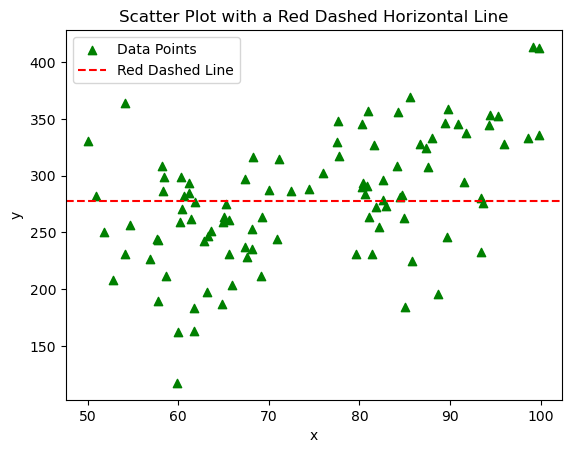

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/Users/bhavesh/Downloads/scatter_data.csv')
data.columns = data.columns.str.strip()
data = data.rename(columns={'% x': 'x', ' y ': 'y'})
plt.scatter(data['x'], data['y'], marker='^', color='green', label='Data Points')
plt.axhline(y=data['y'].mean(), linestyle='--', color='red', label='Red Dashed Line')
plt.title('Scatter Plot with a Red Dashed Horizontal Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()





In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/Users/bhavesh/Downloads/student_grades.csv', comment='%')
data.columns = ["studentID", "avgScore"]
data["avgScore"] = pd.to_numeric(data["avgScore"], errors="coerce")
grade_ranges = [0, 60, 70, 80, 90, 100]
grade_labels = ["F", "D", "C", "B", "A"]


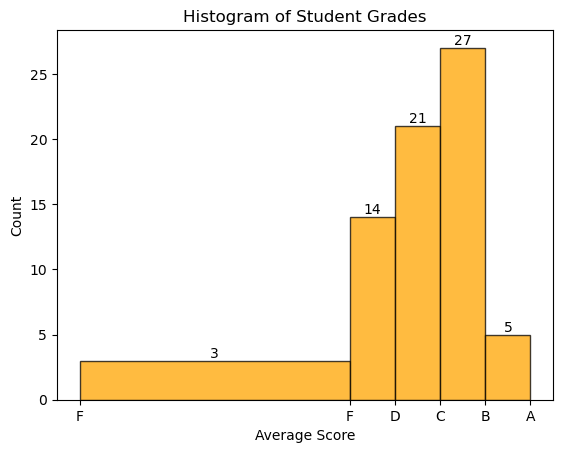

In [6]:
bins = [0,60, 70, 80, 90, 100]
counts, bin_edges = np.histogram(data['avgScore'], bins=bins)

plt.hist(data['avgScore'], bins=bins, edgecolor='black', color='orange', alpha=0.75)

for i, count in enumerate(counts):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.xticks(bins, ['F','F', 'D', 'C', 'B', 'A'])
plt.xlabel('Average Score')
plt.ylabel('Count')

plt.title('Histogram of Student Grades')

plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/bhavesh/Downloads/solution_data.csv", comment="%", header=None)
data.columns = ["Problem", "SolnMethod", "Value"]

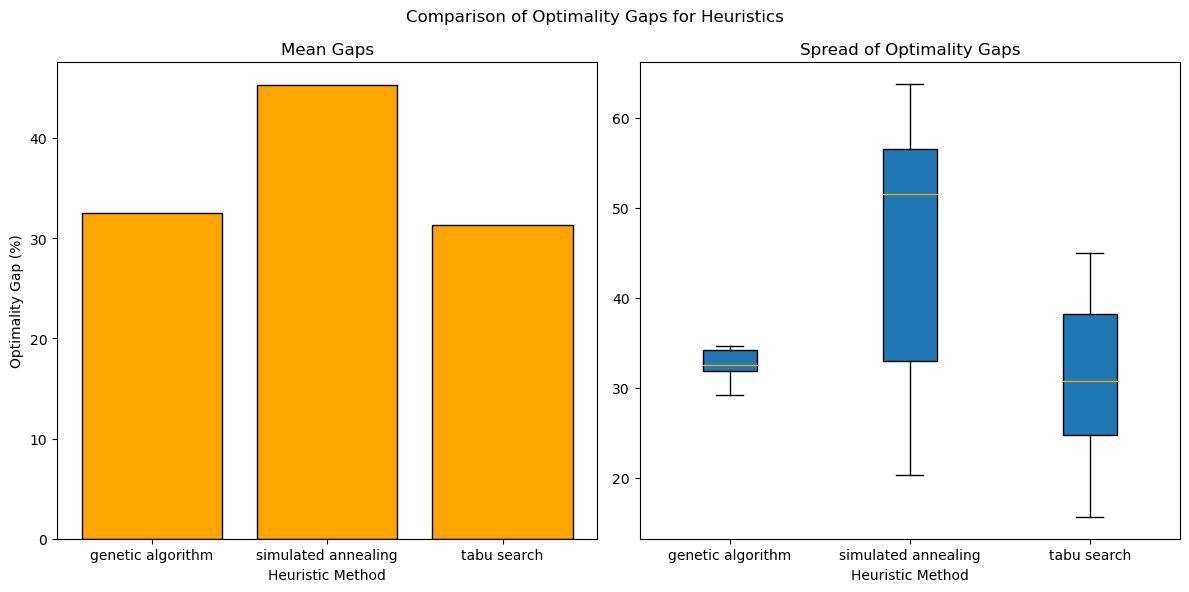

In [103]:
optimal_values = data[data['SolnMethod'] == 'optimal'].groupby('Problem')['Value'].mean()
heuristic_values = data[data['SolnMethod'] != 'optimal'].groupby(['Problem', 'SolnMethod'])['Value'].mean()
optimality_gaps = (optimal_values - heuristic_values) / optimal_values * 100

optimality_gaps = optimality_gaps.reset_index()

barplot_data = pd.DataFrame({
    'Heuristic': optimality_gaps['SolnMethod'],
    'Optimality Gap': optimality_gaps['Value']
})

optimality_gaps = optimality_gaps.reset_index()
average_gaps = barplot_data[barplot_data['Heuristic'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gaps = average_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

axes[0].bar(average_gaps['Heuristic'], average_gaps['Optimality Gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")
data_boxplot = [optimality_gaps[optimality_gaps['SolnMethod'] == method]['Value'] for method in optimality_gaps['SolnMethod'].unique()]

bp = axes[1].boxplot(data_boxplot, labels=optimality_gaps['SolnMethod'].unique(), patch_artist=True, medianprops={'color': 'orange'})

custom_labels = optimality_gaps['SolnMethod'].unique()
custom_positions = range(1, len(custom_labels) + 1)
axes[1].set_xticks(custom_positions)
axes[1].set_xticklabels(custom_labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Spread of Optimality Gaps")

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("/Users/bhavesh/Downloads/Felony_Data.csv")

In [5]:
df2 = df1.drop('County', axis=1)


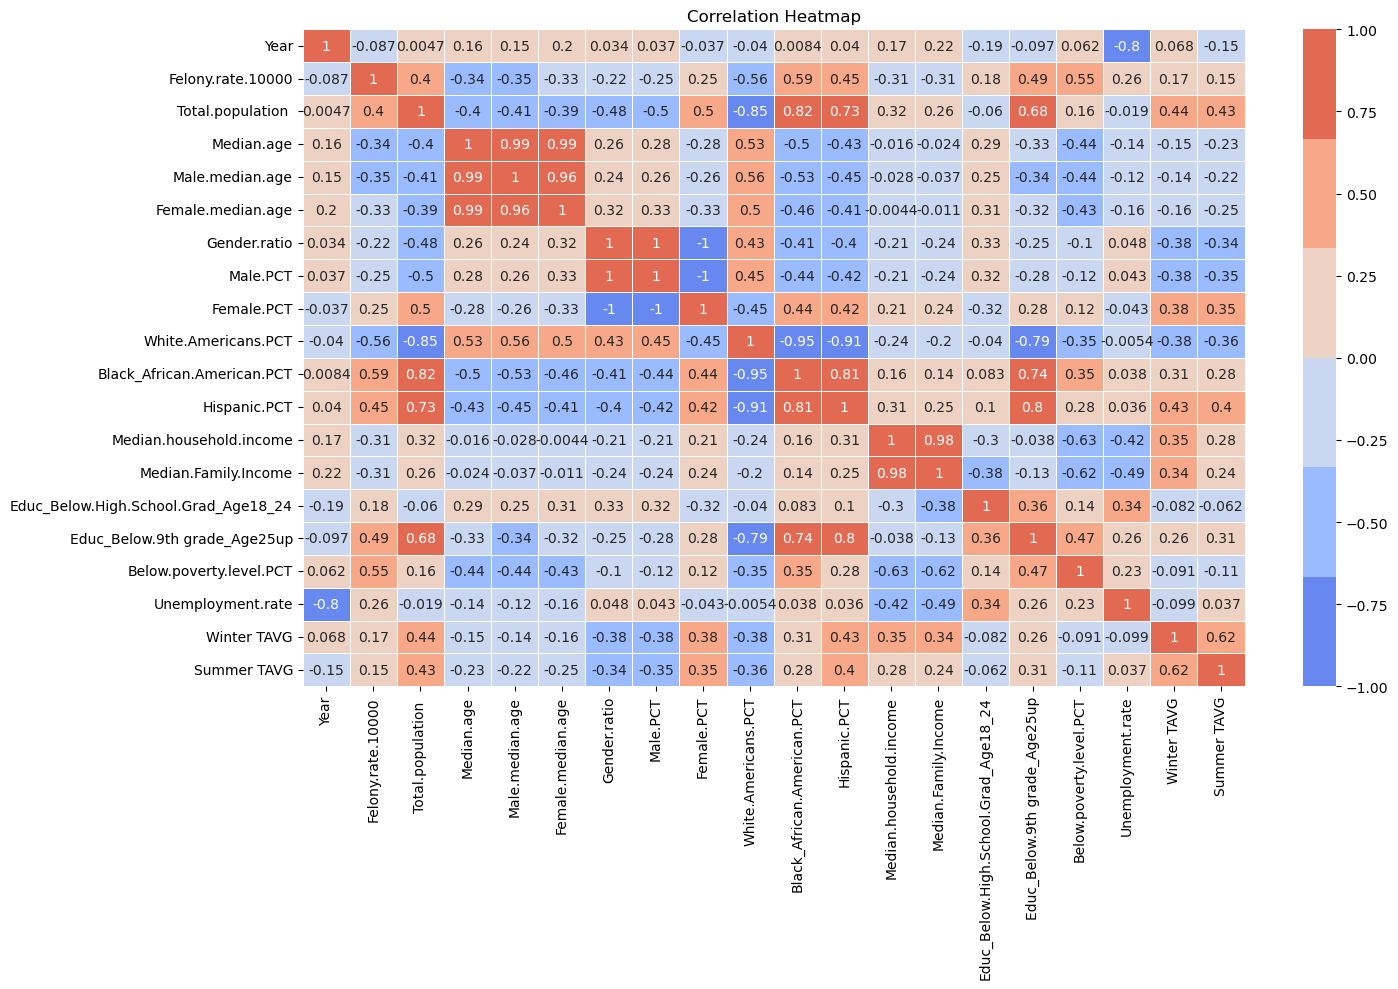

In [9]:
correlation_matrix = df2.corr()
plt.figure(figsize=(15, 10))
color_palette = sns.color_palette("coolwarm")
sns.heatmap(correlation_matrix, annot=True, cmap=color_palette, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()